In [30]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from pandas.api.types import CategoricalDtype
from Utilities import T_test
plt.rcParams['figure.figsize'] = [20, 8]

## Kickstarter Data explore
- Project duration은 최소 1일부터 ~ 60일 
- Pledge는 project가 live할 때, 언제든지 취소가 가능함 (따라서, 최종적으로 실패했더라도 중간에 project goal을 넘을 수 있음)
- Outlier값이 상당히 많은편, Outlier를 제거하고 box plot을 그리면 뚜렷한 차이가 보임

In [31]:
df = pd.read_csv('./0803Data/analysis_data.csv',encoding='utf-16')

In [32]:
df.head()

,project_id,project_launched_at,project_deadline,project_goal,project_category,date,days_to_go,pledged,options_number,title_count,...,diff,success,backer1,backer2,backer3,ratio1,ratio2,ratio3,top_category,super_category
0,1000414645,1560292936,1562884936,10000.0,Science Fiction,1.562814e+09,19.0,20139.0,12.0,35.0,...,2.0,1,13.0,17.0,25.0,37.730000,39.180000,44.94,Film & Video,Film
1,1002877193,1559689942,1562281942,3000.0,Video Games,1.562213e+09,19.0,3217.0,9.0,13.0,...,2.0,1,127.0,149.0,153.0,48.733333,56.233333,58.40,Games,Games
2,1002950518,1559343638,1561935638,500.0,Comics,1.561874e+09,17.0,1306.0,11.0,47.0,...,2.0,1,15.0,19.0,22.0,77.600000,89.800000,105.80,Comics,Comics & Illustartion
3,1003129771,1560307671,1564627671,5000.0,Shorts,1.564618e+09,2.0,14.0,2.0,43.0,...,1.0,0,1.0,1.0,1.0,0.000000,0.000000,0.00,Film & Video,Film
4,1004145683,1561755322,1564347322,250.0,Tabletop Games,1.564285e+09,17.0,867.0,7.0,20.0,...,-1.0,1,5.0,7.0,8.0,3.600000,54.000000,71.20,Games,Games


### 성공/실패 분류 

In [33]:
Success_df = df[df['success'] == 1]
Fail_df = df[df['success'] == 0]

In [34]:
print('Success project size : {0}'.format(Success_df.shape[0]))
print('Fail project size : {0}'.format(Fail_df.shape[0]))

Success project size : 1266
Fail project size : 1230


### Data explore
- 전체로 보는 것은 편차가 너무 큼

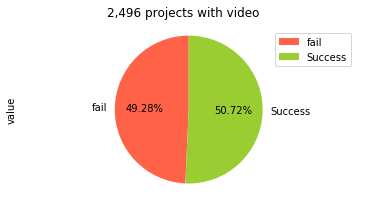

           group  value
fail        fail   1230
Success  Success   1266
Sum : 2496


In [35]:
group = ['fail','Success']
value = df.groupby(['success'])['success'].count().values
pie_df = pd.DataFrame({'group':group,'value':value}, index=['fail','Success'])
total_value = pie_df['value'].sum()
fig = pie_df.plot(kind='pie',y='value',subplots=True, figsize=(6, 3),colors = ['tomato','yellowgreen'],\
                title= '2,496 projects with video', autopct='%.2f%%', startangle=90,shadow=False,\
                fontsize=10)[0]
fig_pie = fig.get_figure()
plt.axis('equal')
plt.show()

fig_pie.savefig('Fig1.pdf')
print(pie_df)
print('Sum : {0}'.format(pie_df['value'].sum()))

### Histogram

In [36]:
from scipy import stats
import numpy as np
# 최적의 bin개수 구하기
# stats.iqr(df['Project_goal'], rng=(25, 75), scale="raw", nan_policy="omit")

In [37]:
def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

In [38]:
# Calculate bins
freedman_diaconis(data=df['project_goal'], returnas="bins")

17441

### 전체 Data의 Project별 Category 숫자

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 14 x 6 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Project categories histogram.pdf
  warn('Filename: {}'.format(filename))


<Figure size 72x576 with 0 Axes>

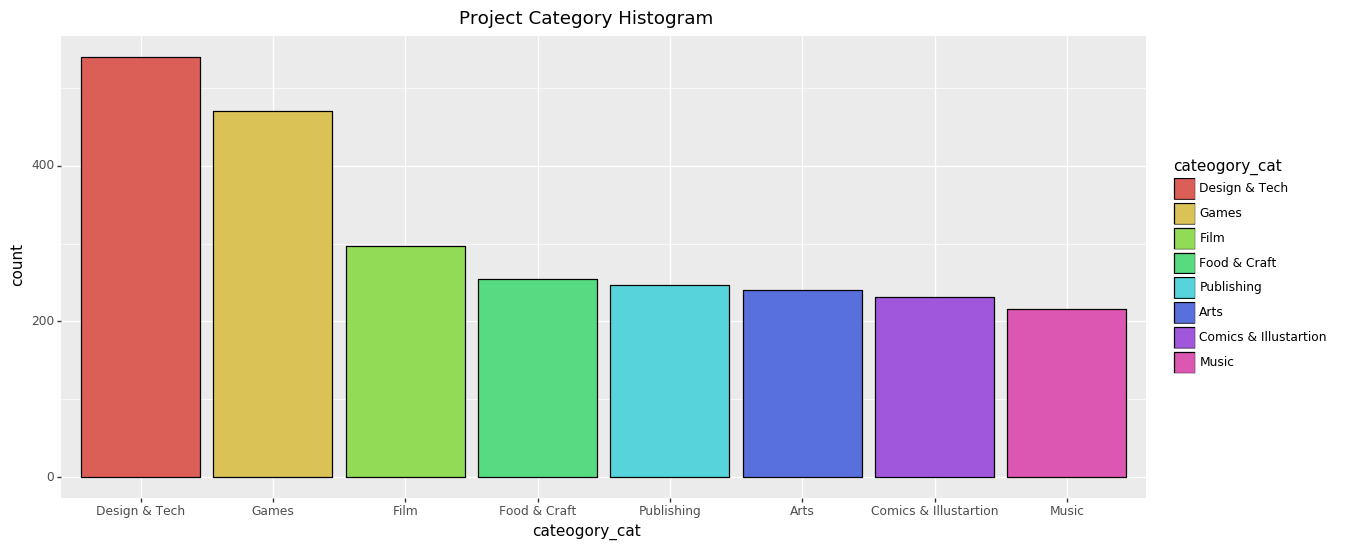

<ggplot: (-9223372036560796391)>

In [39]:
# Determine order and create a categorical type
cateogory_list = df['super_category'].value_counts().index.tolist()
cateogory_cat = CategoricalDtype(categories=cateogory_list, ordered=True)
df['cateogory_cat'] = df['super_category'].astype(str).astype(cateogory_cat)

plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()

# graph 객체 생성
cate_hist = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))
cate_hist.save('Project categories histogram.pdf')
cate_hist

In [40]:
# Total
print(pd.DataFrame(df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(df.groupby(['cateogory_cat'])['cateogory_cat'].count())

2496


,cateogory_cat
cateogory_cat,
Design & Tech,539
Games,470
Film,297
Food & Craft,255
Publishing,247
Arts,241
Comics & Illustartion,231
Music,216


### 성공/실패 Project별 Category 숫자

In [41]:
df.head()

,project_id,project_launched_at,project_deadline,project_goal,project_category,date,days_to_go,pledged,options_number,title_count,...,success,backer1,backer2,backer3,ratio1,ratio2,ratio3,top_category,super_category,cateogory_cat
0,1000414645,1560292936,1562884936,10000.0,Science Fiction,1.562814e+09,19.0,20139.0,12.0,35.0,...,1,13.0,17.0,25.0,37.730000,39.180000,44.94,Film & Video,Film,Film
1,1002877193,1559689942,1562281942,3000.0,Video Games,1.562213e+09,19.0,3217.0,9.0,13.0,...,1,127.0,149.0,153.0,48.733333,56.233333,58.40,Games,Games,Games
2,1002950518,1559343638,1561935638,500.0,Comics,1.561874e+09,17.0,1306.0,11.0,47.0,...,1,15.0,19.0,22.0,77.600000,89.800000,105.80,Comics,Comics & Illustartion,Comics & Illustartion
3,1003129771,1560307671,1564627671,5000.0,Shorts,1.564618e+09,2.0,14.0,2.0,43.0,...,0,1.0,1.0,1.0,0.000000,0.000000,0.00,Film & Video,Film,Film
4,1004145683,1561755322,1564347322,250.0,Tabletop Games,1.564285e+09,17.0,867.0,7.0,20.0,...,1,5.0,7.0,8.0,3.600000,54.000000,71.20,Games,Games,Games


In [42]:
df['success'] = df['success'].apply(lambda x : 'Success' if x == 1 else 'Fail')

In [16]:
# success_dict = {1:'Success',0:"Fail"}
# df['Success'] = df['Success'].map(success_dict)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 14 x 6 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Project categories histogram by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 72x576 with 0 Axes>

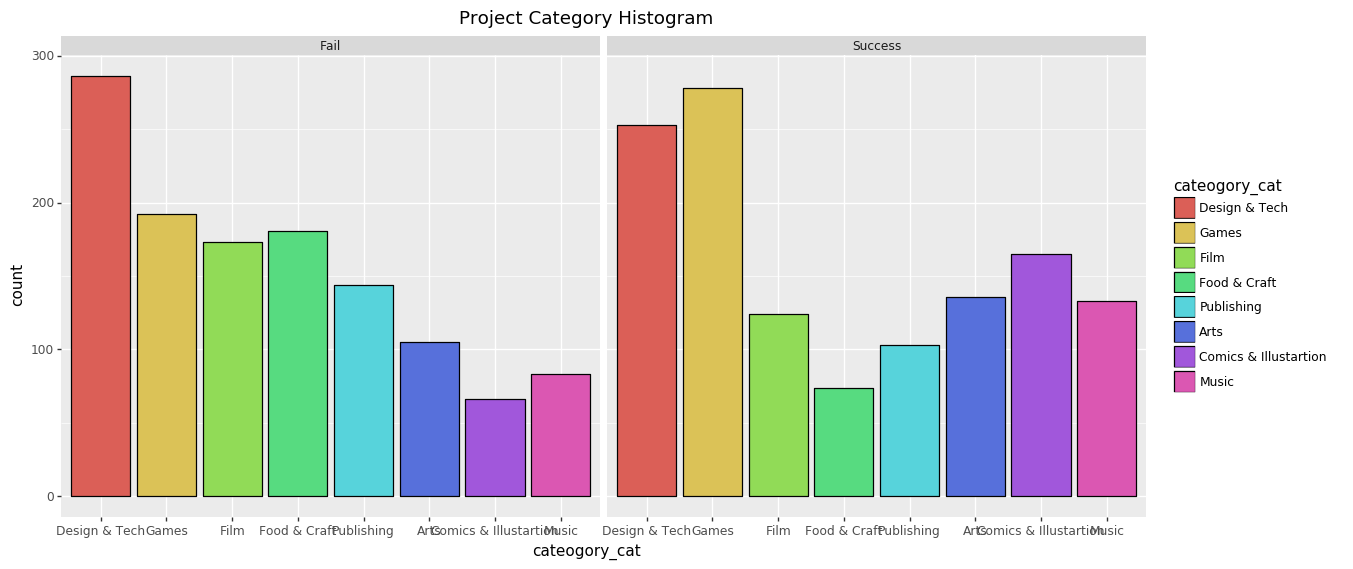

<ggplot: (-9223372036560796174)>

In [43]:
plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()


# graph 객체 생성
com_plot = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))\
    + facet_wrap('~success')
com_plot.save('Project categories histogram by success.pdf')
com_plot

In [44]:
Success_df = df[df['success'] == 'Success']
Fail_df = df[df['success'] == 'Fail']

In [46]:
# success
print('success')
Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count()
print(pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count())
#print(pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count()).sum())

success
1266


,cateogory_cat
cateogory_cat,
Design & Tech,253
Games,278
Film,124
Food & Craft,74
Publishing,103
Arts,136
Comics & Illustartion,165
Music,133


In [47]:
# fails
print('fail')
Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count()
print(pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count())
#print(pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count()).sum())

fail
1230


,cateogory_cat
cateogory_cat,
Design & Tech,286
Games,192
Film,173
Food & Craft,181
Publishing,144
Arts,105
Comics & Illustartion,66
Music,83


### Extracting random porject Id 

In [50]:
# In the case of success
Success_Id = Success_df['project_id'].values
np.random.choice(Success_Id,50)

array([1069682231,  978592772,  193482239, 2128725189, 1866769021,
       1227911218,  269345764,  951323047, 1062955927, 1986656020,
       1245605236, 2112987587,  123861878,  951323047, 1011832030,
       1323976299,  853120791,  891309865,  989572890,  372360890,
       1231903555, 1330877109, 1829666631,  121530126, 1935790542,
        213977892, 1190534671, 1092438409, 1413607785, 1768903226,
        757750956,  908393577, 1845631671, 1574720462, 1025123568,
       1930072557, 1006560474,  182769150, 1924963681,  880251106,
        103559442,  681760995, 1711971434,  819291103, 1709177560,
        713357973,  494659268, 1615436350, 1445696196,  718304025])

In [51]:
# In the case of fail
Fail_df
Fail_Id = Fail_df['project_id'].values
np.random.choice(Fail_Id,50)

array([ 150569889,  540885289, 1246489716,   30289166, 1606829626,
       1175513963, 1175513963, 1240389314, 1293345592,  117728616,
       1075229114,  244307325, 1019588208, 2101988927, 1156646700,
         66331884,  195890976, 1003129771,  277296509, 1025433522,
       1024192948,  720842902, 2039211778,  390416577,  201034103,
        218010287, 1879259663, 1986377457, 1057256049, 1323925202,
       2113711135,  955055415,  830052542,  969252435, 1411564463,
       1213823515, 1246489716, 1891361828, 1957381362, 1855601620,
        784341570, 1156886321, 1356321507, 1078600758,  468891600,
       1091809927, 1108409777, 1653289235, 1835329093, 1082286606])